In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('G:/data/dataset/diabetes.csv')

analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#df.iloc[:,:-1].plot()

In [7]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Univariate analysis

In [9]:
df.loc[df['Outcome'] == 1,:].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


In [10]:
def plot_distribution(df):
    import scipy
    import matplotlib.pyplot as plt
    import seaborn as sns
    p = []
    s = []
    sig = pd.DataFrame()
    sig['variable'] = df.iloc[:,1:-1].columns
    for i in range(len(df.iloc[:,1:-1].columns)):
        #T-Test(two sample)
        statistic,pvalue=scipy.stats.ttest_ind(df['Outcome'],
                                               df[df.iloc[:,1:-1].columns[i]], 
                                               axis=0, equal_var=True, 
                                               nan_policy='propagate')
        p.append(pvalue)
        if pvalue < 0.05:
            significance='is significant'
            
        else :
            significance='is not significant'
        s.append(significance)
        
        f,ax =plt.subplots(figsize=(12,6),
                   nrows=1, ncols=1, sharex=False, sharey=False, 
                   squeeze=True, subplot_kw=None, gridspec_kw=None)
        
        sns.distplot( df.loc[df['Outcome']==1,df.iloc[:,1:-1].columns[i]], bins=None,
                 hist=True, kde=True, rug=False, fit=None, hist_kws=None,
                 kde_kws=None , rug_kws=None, fit_kws=None, color=None , 
                 vertical=False, norm_hist=False, axlabel=None, label='Diabetes', ax=None)
        
        sns.distplot( df.loc[df['Outcome']==0,df.iloc[:,1:-1].columns[i]], bins=None,
                 hist=True, kde=True, rug=False, fit=None, hist_kws=None,
                 kde_kws=None , rug_kws=None, fit_kws=None, color=None , 
                 vertical=False, norm_hist=False, axlabel=None, label='Normal', ax=None)
        
        plt.title('Distribution of '+df.iloc[:,1:-1].columns[i]+' '+significance+'( P_value(T_test) :'+str(pvalue)+')',
                  color='black')
        
        plt.legend()
        plt.show()
    
    sig['P_value'] = p
    sig['Significance']=s
    return sig

c:\users\priyasathya\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


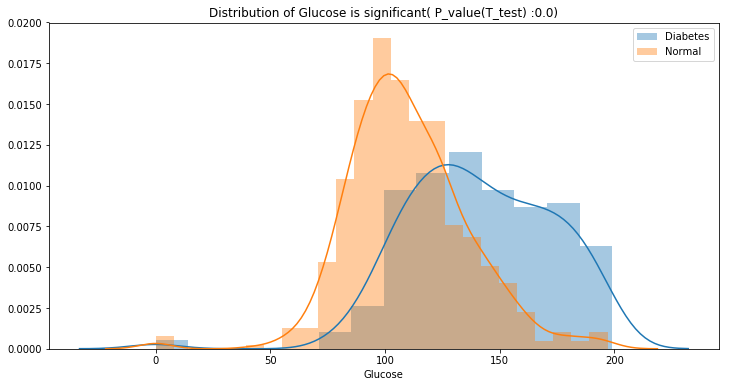

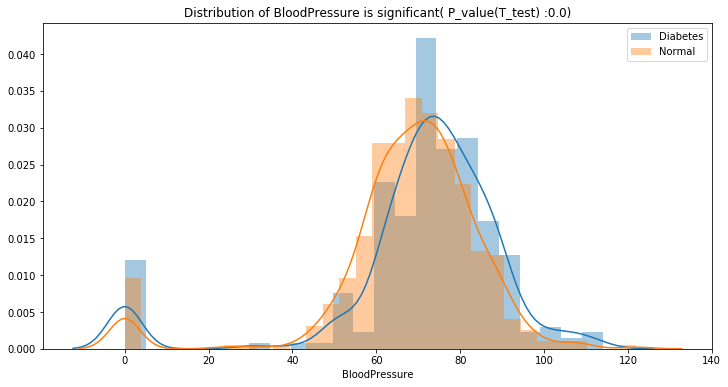

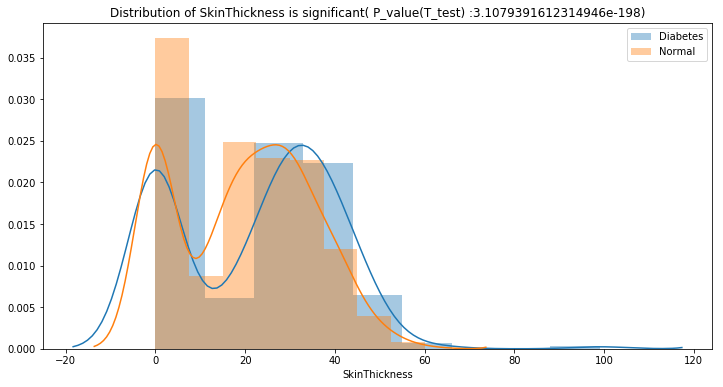

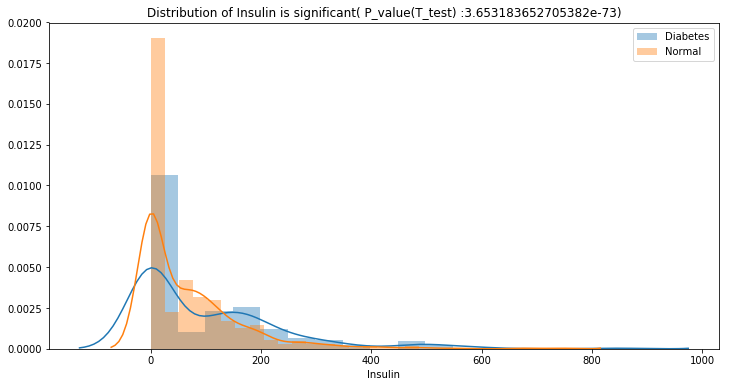

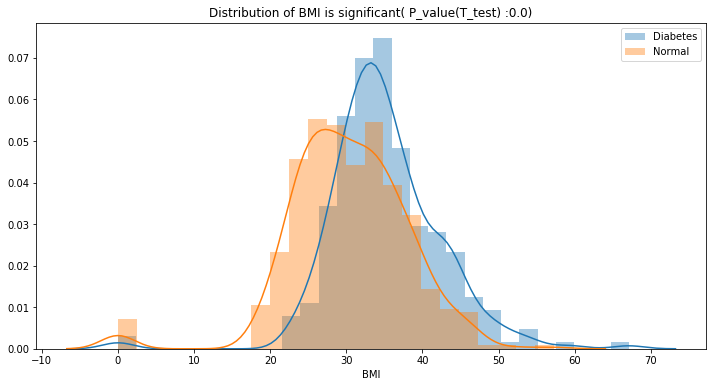

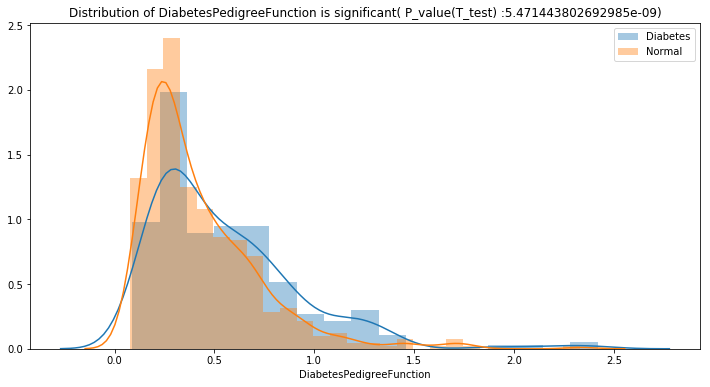

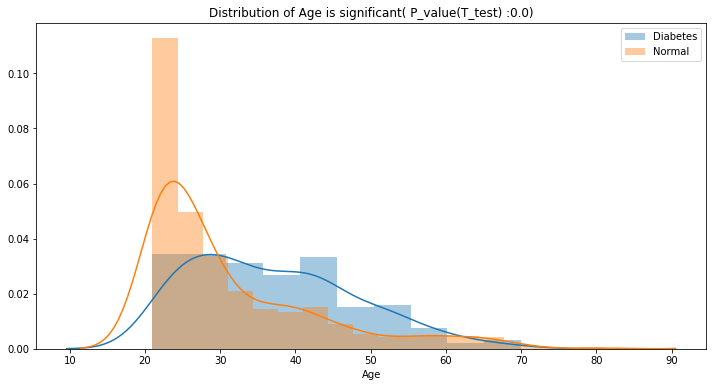

In [11]:
sig = plot_distribution(df)

# Hypothesis testing:

In [12]:
sig

,variable,P_value,Significance
0,Glucose,0.000000e+00,is significant
1,BloodPressure,0.000000e+00,is significant
2,SkinThickness,3.107939e-198,is significant
3,Insulin,3.653184e-73,is significant
4,BMI,0.000000e+00,is significant
5,DiabetesPedigreeFunction,5.471444e-09,is significant
6,Age,0.000000e+00,is significant


# Bivariate analysis

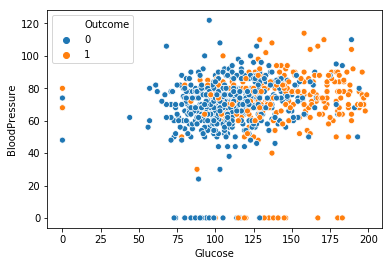

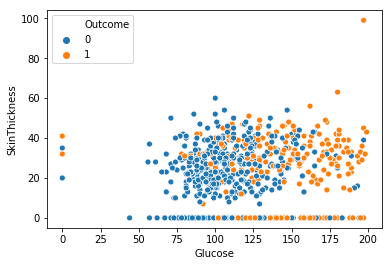

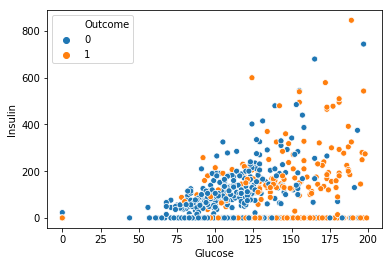

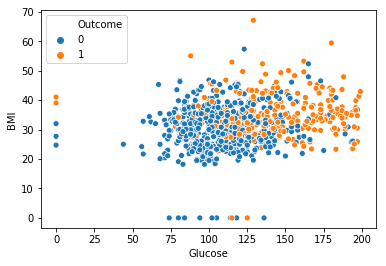

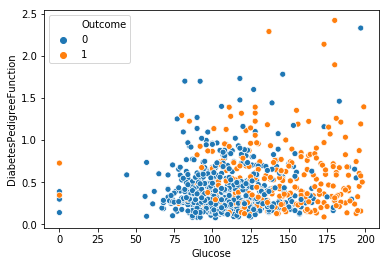

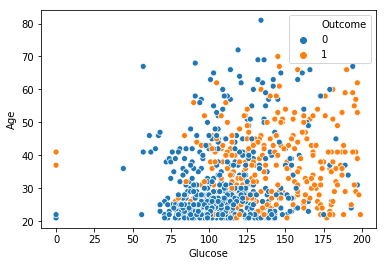

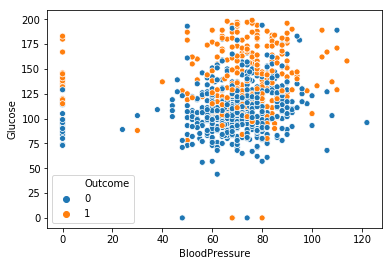

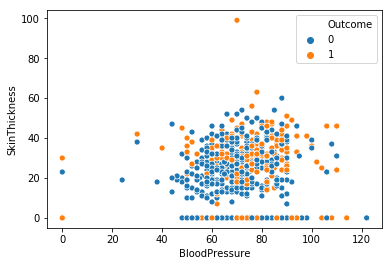

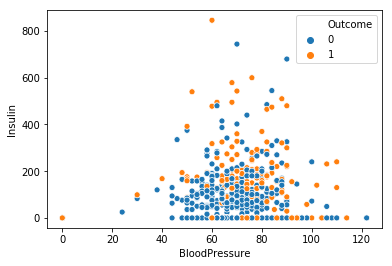

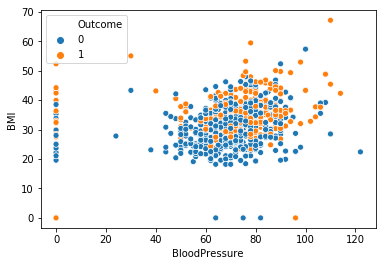

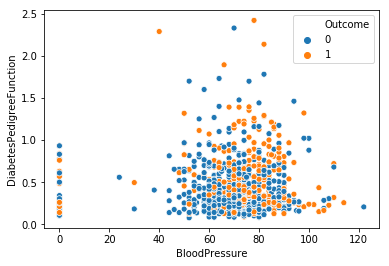

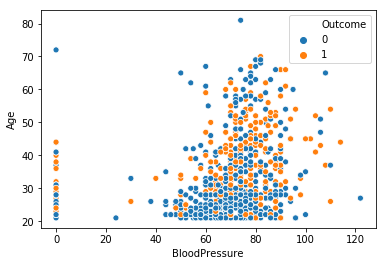

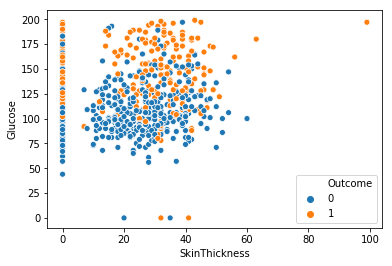

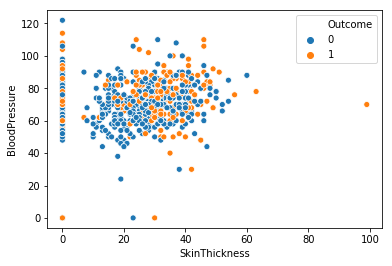

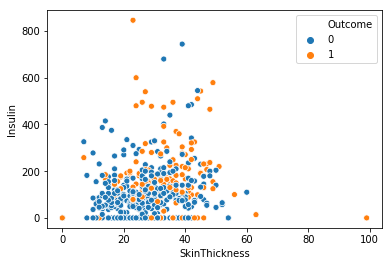

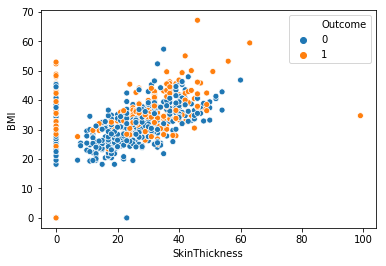

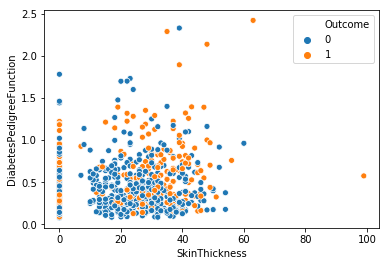

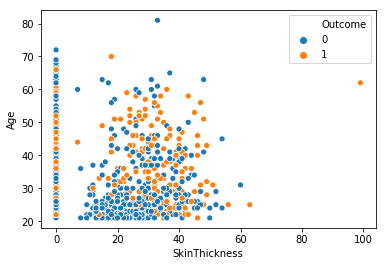

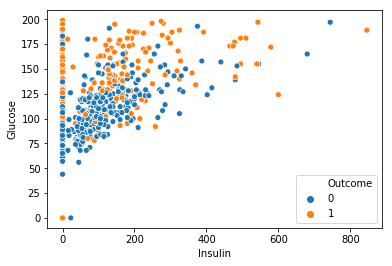

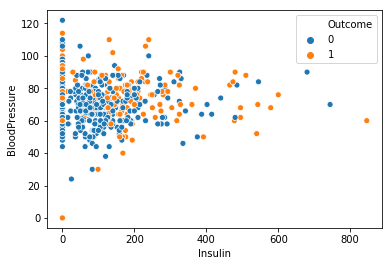

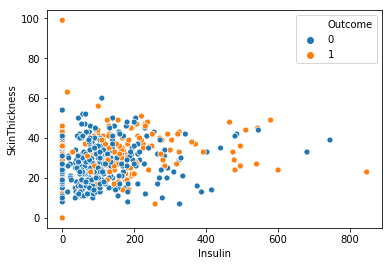

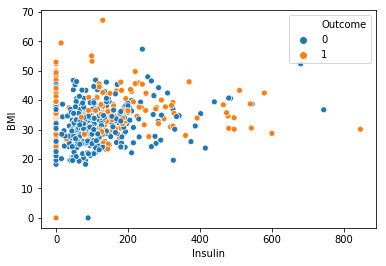

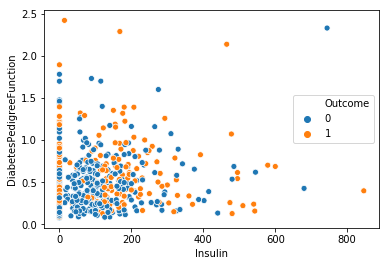

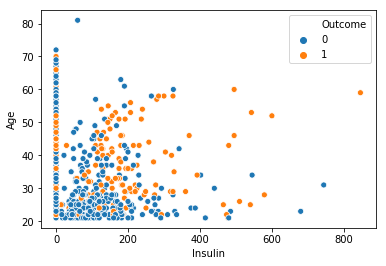

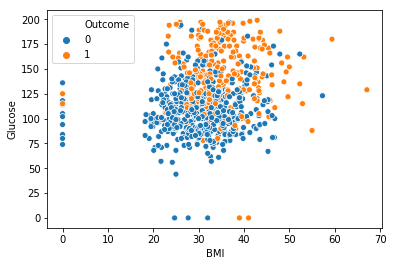

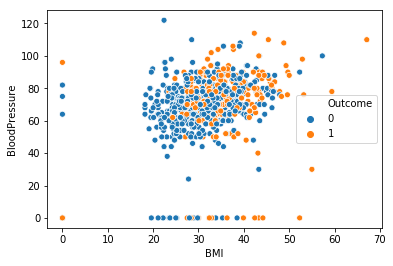

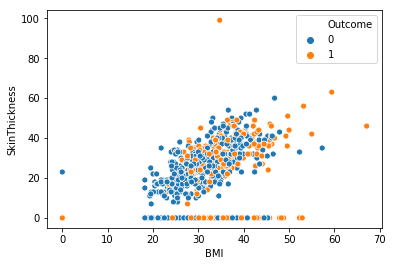

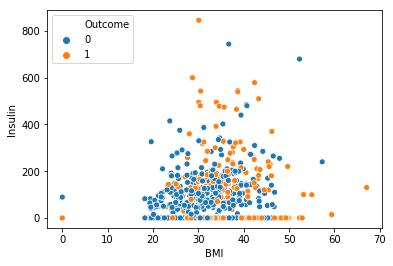

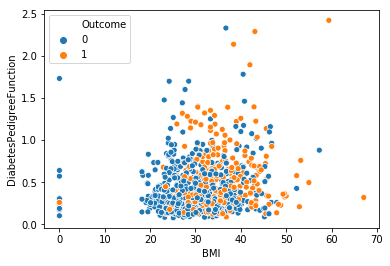

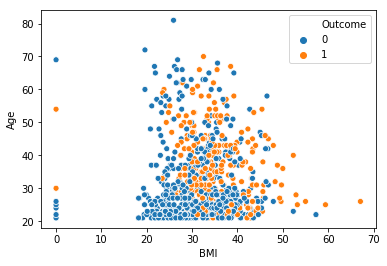

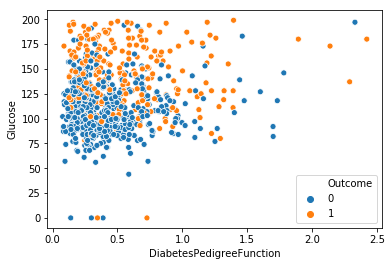

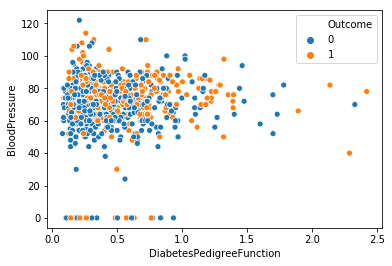

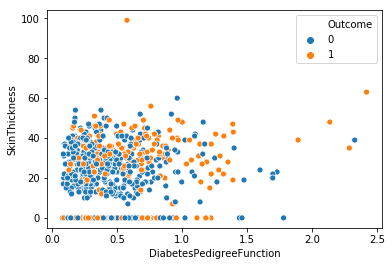

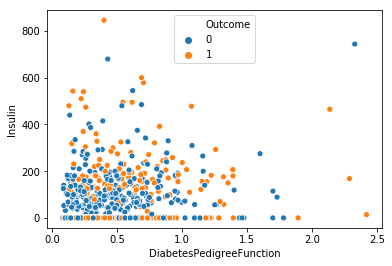

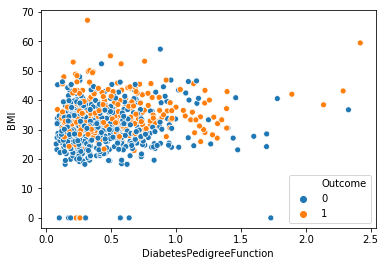

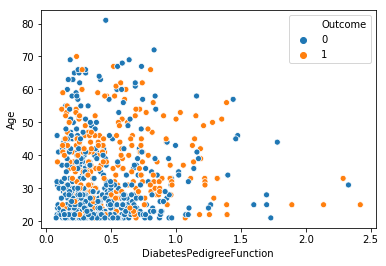

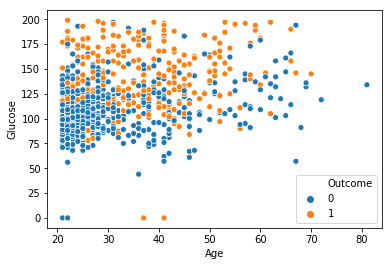

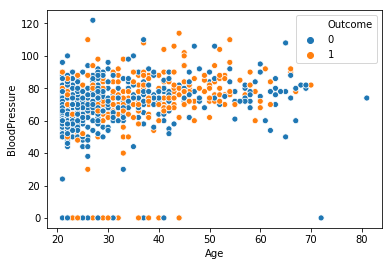

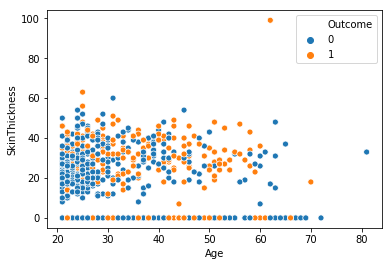

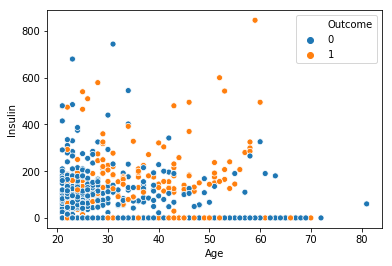

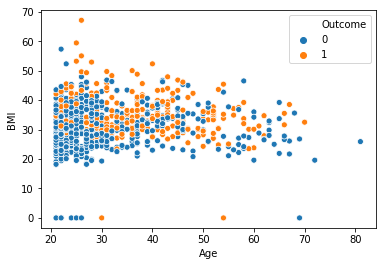

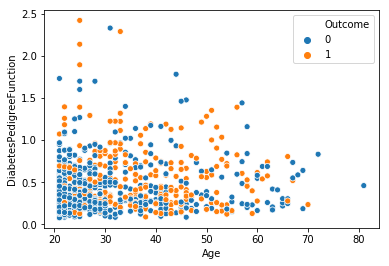

In [13]:
for i in df.iloc[:,1:-1].columns:
    for j in df.iloc[:,1:-1].columns:
        if i != j :
            sns.scatterplot(x=i, y=j, hue='Outcome', style=None, size=None, data=df, 
                palette=None, hue_order=None, hue_norm=None, sizes=None, 
                size_order=None, size_norm=None, markers=True, style_order=None,
                x_bins=None, y_bins=None, units=None, estimator=None,
                ci=95, n_boot=1000, alpha='auto', x_jitter=None,
                y_jitter=None, legend='brief', ax=None)
            plt.show()



In [16]:
con =pd.crosstab( df['Outcome'],df['Pregnancies'],margins=True)
con

Pregnancies,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,All
Outcome,,,,,,,,,,,,,,,,,,
0,73,106,84,48,45,36,34,20,16,10,14,4,5,5,0,0,0,500
1,38,29,19,27,23,21,16,25,22,18,10,7,4,5,2,1,1,268
All,111,135,103,75,68,57,50,45,38,28,24,11,9,10,2,1,1,768


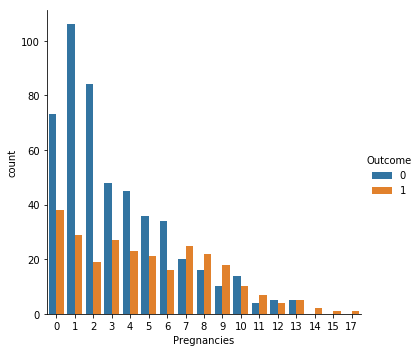

In [25]:

sns.catplot(x='Pregnancies', y=None, hue='Outcome',
            data=df, row=None, col=None,col_wrap=None,
             ci=95, n_boot=1000,
            units=None, order=None, hue_order=None, row_order=None, col_order=None,
            kind='count', height=5, aspect=1, orient=None, color=None,
            palette=None, legend=True, legend_out=True,
            sharex=True, sharey=True, margin_titles=False, facet_kws=None)

In [23]:
from scipy import stats
stats.chi2_contingency(con)[0:3]



(64.59480868723006, 0.0011894967534146464, 34)

p_value = 0.0011894967534146464 (  < 0.05)

People high number of pregnencies are more prone to diabetes

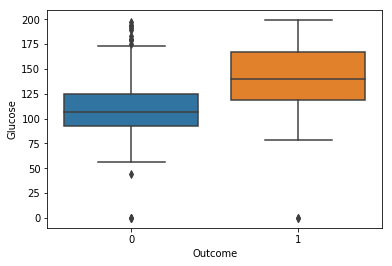

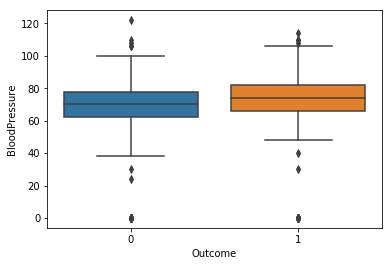

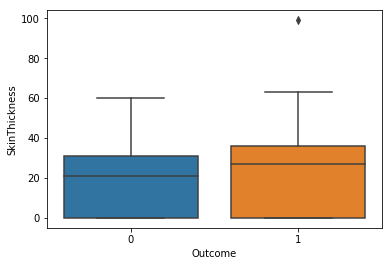

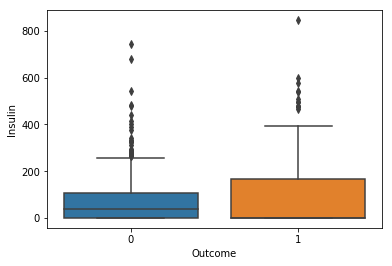

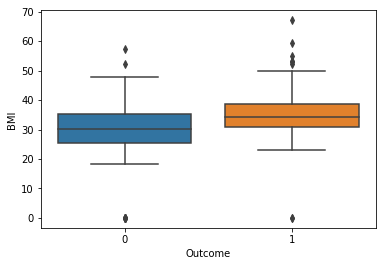

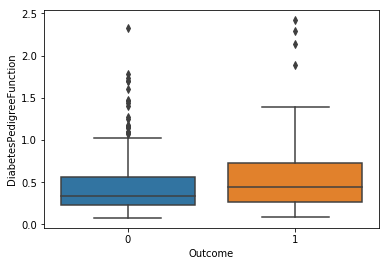

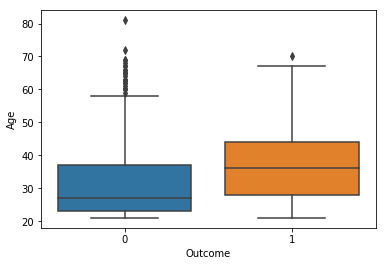

In [35]:
for i in df.iloc[:,1:-1].columns:
    sns.boxplot(x='Outcome', y=i,# hue='Outcome',
                data=df)
    plt.show()

There are few outliers.

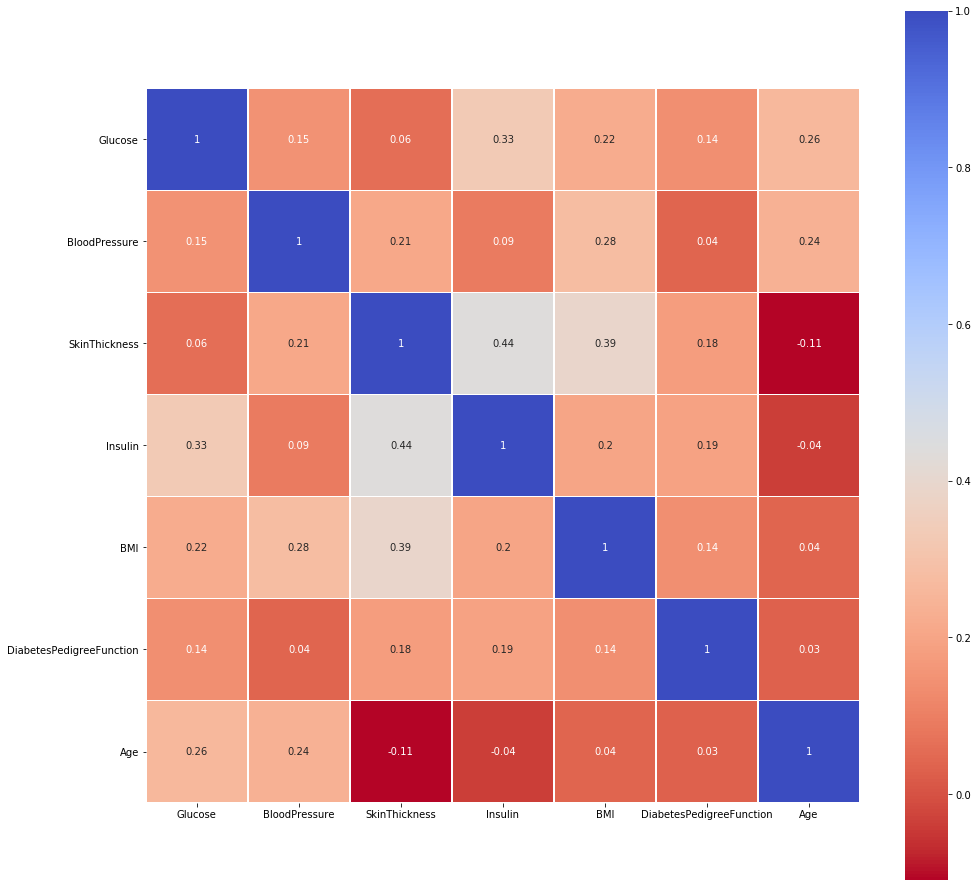

In [57]:
#correlation plot
f,ax =plt.subplots(figsize=(16,16),
                   nrows=1, ncols=1, sharex=False, sharey=False, 
                   squeeze=True, subplot_kw=None, gridspec_kw=None)

cor = df.iloc[:,1:-1].corr()
sns.heatmap(round((cor),2), vmin=None, vmax=None, cmap='coolwarm_r', center=None,
            robust=False, annot=True, fmt='.2g', annot_kws=None,
            linewidths=0.5, linecolor='white', cbar=True, cbar_kws=None,
            cbar_ax=None,square=True, xticklabels='auto',
            yticklabels='auto', mask=None, ax=ax)

plt.show()


No Multicollinearity

all the varibles are significant

In [30]:
# Confusion matrix 
import itertools

from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,confusion_matrix


def plot_confusion_matrix(y_test,y_pred, classes=[0,1],
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = 'Blues') :
    cm = confusion_matrix(y_test,y_pred)
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
#Evaluation metrics
def evaluation_sklearn(y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    
    print('True_Positive:',cm[1][1])
    print('True_Negative:',cm[0][0])
    print('False_Positive:',cm[0][1])
    print('False_Negative:',cm[1][0])
    print('Accuracy :',accuracy_score(y_test,y_pred))
    print('ROC_AUC_score :',roc_auc_score(y_test,y_pred))
    print('Precision :',precision_score(y_test,y_pred))
    print('Recall :',recall_score(y_test,y_pred))
    print('F-statistic :',f1_score)
#
#ROC 
from sklearn.metrics import roc_curve,auc
def ROC_AUC_curve(x_test,y_test,model):
    roc, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5))
    probs = model.predict_proba(x_test)
    y_prob = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, y_prob)

    from sklearn import metrics
    roc_auc= auc(fpr, tpr)

    ax.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    ax.plot([0, 1], [0, 1],'r--')
    ax.set_title('Receiver Operating Characteristic ',fontsize=20,color ='lightblue')
    ax.set_ylabel('True Positive Rate',fontsize=15,color ='grey')
    ax.set_xlabel('False Positive Rate',fontsize=15,color ='grey')
    ax.legend(loc = 'lower right', prop={'size': 16})

    plt.subplots_adjust(wspace=1)

# Modelling:

In [24]:
# Load libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
#from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

In [25]:
x = df.drop('Outcome',axis = 1)
y=df['Outcome']

In [27]:
# Create standardizer
standardizer = StandardScaler()

# Standardize features
x_std = standardizer.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=0.2)

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
from sklearn.model_selection import GridSearchCV

#Grid search
param_grid ={'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
knn_cv = GridSearchCV(estimator = knn, param_grid = param_grid ,
                      scoring = 'accuracy', 
                      n_jobs = -1)
knn_cv.fit(x_train, y_train)

best_parameters = knn_cv.best_params_
print('The best parameters for using this model is', best_parameters)

The best parameters for using this model is {'n_neighbors': 4}


In [29]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

True_Positive: 21
True_Negative: 85
False_Positive: 9
False_Negative: 39
Accuracy : 0.6883116883116883
ROC_AUC_score : 0.6271276595744681
Precision : 0.7
Recall : 0.35
F-statistic : <function f1_score at 0x0000021469F2C2F0>


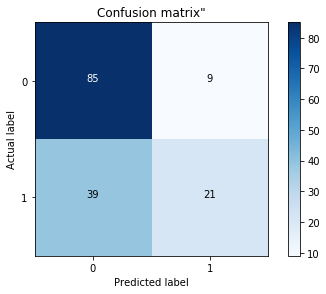

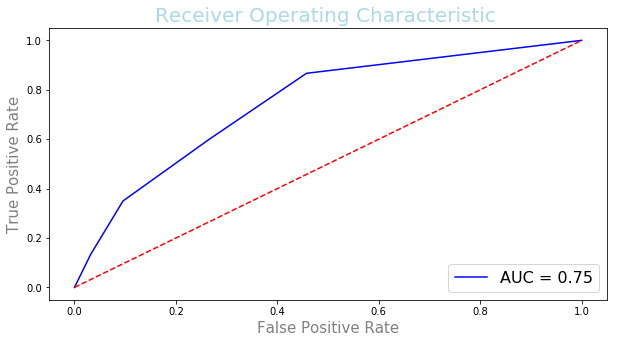

In [31]:
plot_confusion_matrix(y_test,y_pred)
evaluation_sklearn(y_test,y_pred)
ROC_AUC_curve(x_test,y_test,model=knn)

In [37]:
r_s = 100

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=100,
                                                 test_size=0.2,stratify=None,
                                                 shuffle=False)

In [39]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
                         fit_intercept=True, intercept_scaling=1, 
                         class_weight=None, random_state=r_s,
                         solver='liblinear', max_iter=100, multi_class='ovr',
                         verbose=0, warm_start=False, n_jobs=1)
log.fit(x_train,y_train)
y_pred = log.predict(x_test)
y_proba = log.predict_proba(x_test)

True_Positive: 28
True_Negative: 89
False_Positive: 10
False_Negative: 27
Accuracy : 0.7597402597402597
ROC_AUC_score : 0.704040404040404
Precision : 0.7368421052631579
Recall : 0.509090909090909
F-statistic : <function f1_score at 0x0000021469F2C2F0>


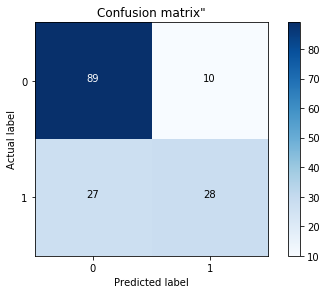

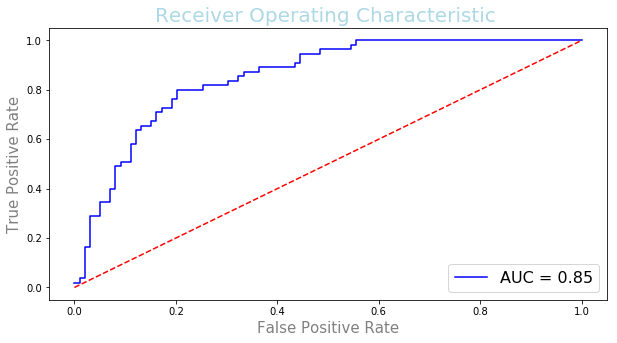

In [41]:
plot_confusion_matrix(y_test,y_pred)
evaluation_sklearn(y_test,y_pred)
ROC_AUC_curve(x_test,y_test,model=log)

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                             max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                             bootstrap=True, oob_score=False,
                             n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)

c:\users\priyasathya\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [45]:
from sklearn.model_selection import GridSearchCV

param_grid ={'n_estimators':[10,50,100], 'criterion':['gini','entropy']}
rfc_cv = GridSearchCV(estimator = rfc, param_grid = param_grid ,
                      scoring = 'recall', 
                      n_jobs = -1)
rfc_cv.fit(x_train, y_train)

best_parameters = rfc_cv.best_params_
print('The best parameters for using this model is', best_parameters)

The best parameters for using this model is {'criterion': 'entropy', 'n_estimators': 100}


In [46]:
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                             max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                             bootstrap=True, oob_score=False,
                             n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)

In [47]:

rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

True_Positive: 29
True_Negative: 87
False_Positive: 12
False_Negative: 26
Accuracy : 0.7532467532467533
ROC_AUC_score : 0.7030303030303031
Precision : 0.7073170731707317
Recall : 0.5272727272727272
F-statistic : <function f1_score at 0x0000021469F2C2F0>


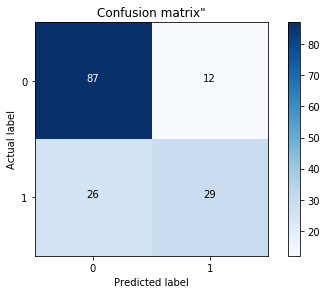

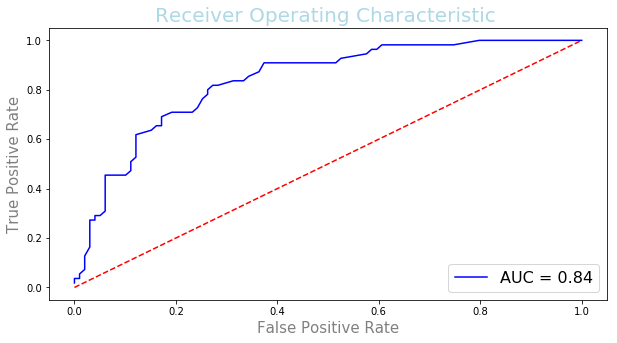

In [48]:
plot_confusion_matrix(y_test,y_pred)
evaluation_sklearn(y_test,y_pred)
ROC_AUC_curve(x_test,y_test,model=rfc)

True_Positive: 31
True_Negative: 84
False_Positive: 15
False_Negative: 24
Accuracy : 0.7467532467532467
ROC_AUC_score : 0.706060606060606
Precision : 0.6739130434782609
Recall : 0.5636363636363636
F-statistic : <function f1_score at 0x0000021469F2C2F0>


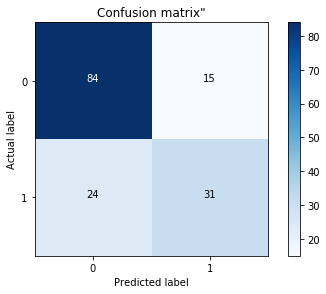

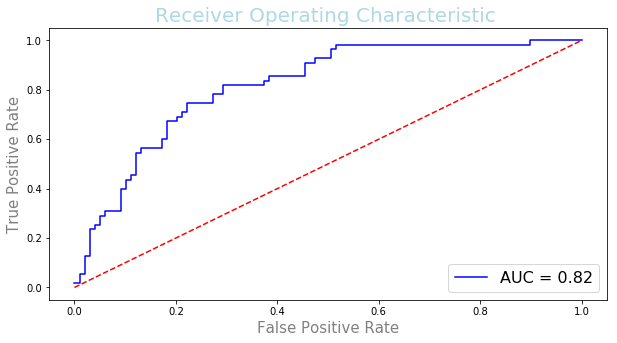

In [50]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)

plot_confusion_matrix(y_test,y_pred)
evaluation_sklearn(y_test,y_pred)
ROC_AUC_curve(x_test,y_test,model=nb)


c:\users\priyasathya\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\priyasathya\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


True_Positive: 31
True_Negative: 84
False_Positive: 15
False_Negative: 24
Accuracy : 0.7467532467532467
ROC_AUC_score : 0.706060606060606
Precision : 0.6739130434782609
Recall : 0.5636363636363636
F-statistic : <function f1_score at 0x0000021469F2C2F0>


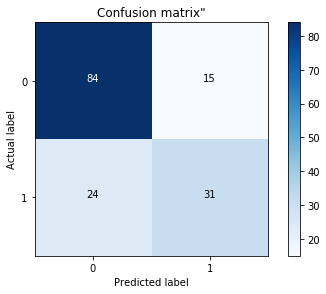

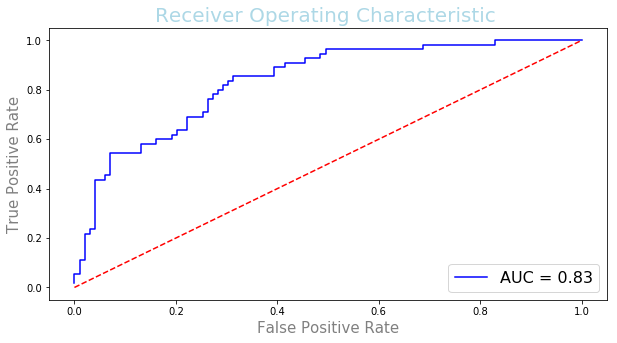

In [51]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()

xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)

xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)

plot_confusion_matrix(y_test,y_pred)
evaluation_sklearn(y_test,y_pred)
ROC_AUC_curve(x_test,y_test,model=xgb)